This chapter details fundamentals of spatial data analysis and Vector data analysis.

In [15]:
# importing the modules
import seaborn as sns
import matplotlib.pyplot as plt
import earthpy as et
import geopandas as gpd

sns.set(font_scale=1.0, style='white')
%matplotlib inline

In [2]:
# importing tree locations from the spatial vector data
df_tree = gpd.read_file('C:/Users/Juliance/Desktop/Earth_DS/spatial-vector-lidar/california/neon-sjer-site/vector_data/SJER_plot_centroids.shp')
df_tree.head()

,Plot_ID,Point,northing,easting,plot_type,geometry
0,SJER1068,center,4111567.818,255852.376,trees,POINT (255852.376 4111567.818)
1,SJER112,center,4111298.971,257406.967,trees,POINT (257406.967 4111298.971)
2,SJER116,center,4110819.876,256838.760,grass,POINT (256838.760 4110819.876)
3,SJER117,center,4108752.026,256176.947,trees,POINT (256176.947 4108752.026)
4,SJER120,center,4110476.079,255968.372,grass,POINT (255968.372 4110476.079)


In [3]:
# viewing the geometry of the dataset
df_tree.geom_type

0     Point
1     Point
2     Point
3     Point
4     Point
5     Point
6     Point
7     Point
8     Point
9     Point
10    Point
11    Point
12    Point
13    Point
14    Point
15    Point
16    Point
17    Point
dtype: object

In [4]:
# viewing the CRS of the object
df_tree.crs

<Derived Projected CRS: EPSG:32611>
Name: WGS 84 / UTM zone 11N
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Between 120°W and 114°W, northern hemisphere between equator and 84°N, onshore and offshore. Canada - Alberta; British Columbia (BC); Northwest Territories (NWT); Nunavut. Mexico. United States (USA).
- bounds: (-120.0, 0.0, -114.0, 84.0)
Coordinate Operation:
- name: UTM zone 11N
- method: Transverse Mercator
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [5]:
# viewing the spatial extent of the data
# this shows the furthest extent to the data in all four corners
df_tree.total_bounds

array([ 254738.618, 4107527.074,  258497.102, 4112167.778])

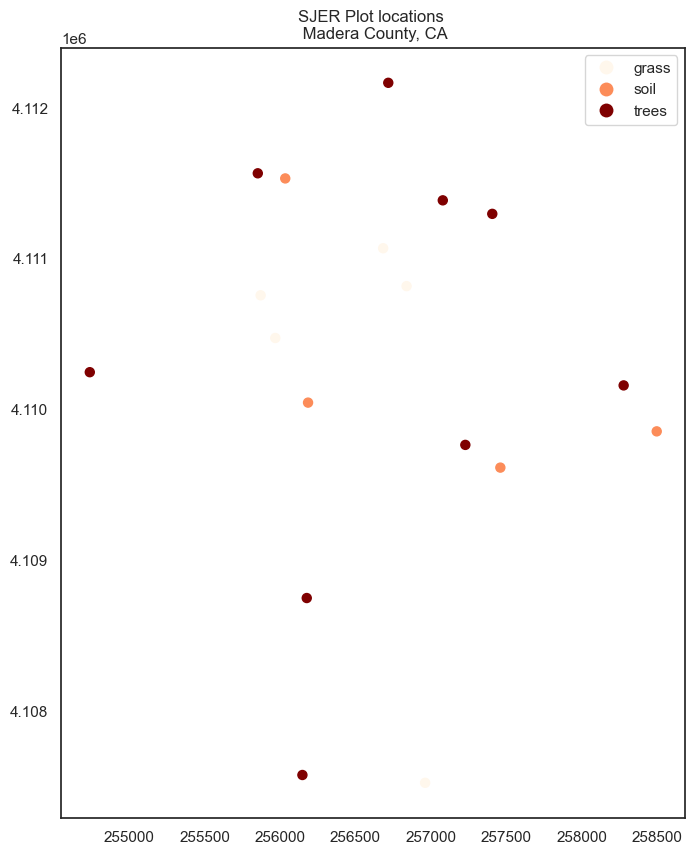

In [20]:
# plotting the shapefile
fig, ax = plt.subplots(figsize=(10,10))

df_tree.plot(
    column='plot_type',
    categorical=True,
    legend=True,
    markersize=42,
    cmap="OrRd",
    ax=ax
)
ax.set(title='SJER Plot locations \n Madera County, CA')
plt.show()

In [21]:
# reading an additional file 
crop_extent = gpd.read_file('C:/Users/Juliance/Desktop/Earth_DS/spatial-vector-lidar/california/neon-sjer-site/vector_data/SJER_crop.shp')
crop_extent.head()

,Id,geometry
0,0,"POLYGON ((254570.567 4112361.920, 258867.409 4..."


Text(0.5, 1.0, 'Spatial plot of SJER plot locations layered on top of the plot boundary.\n Madera County, CA')

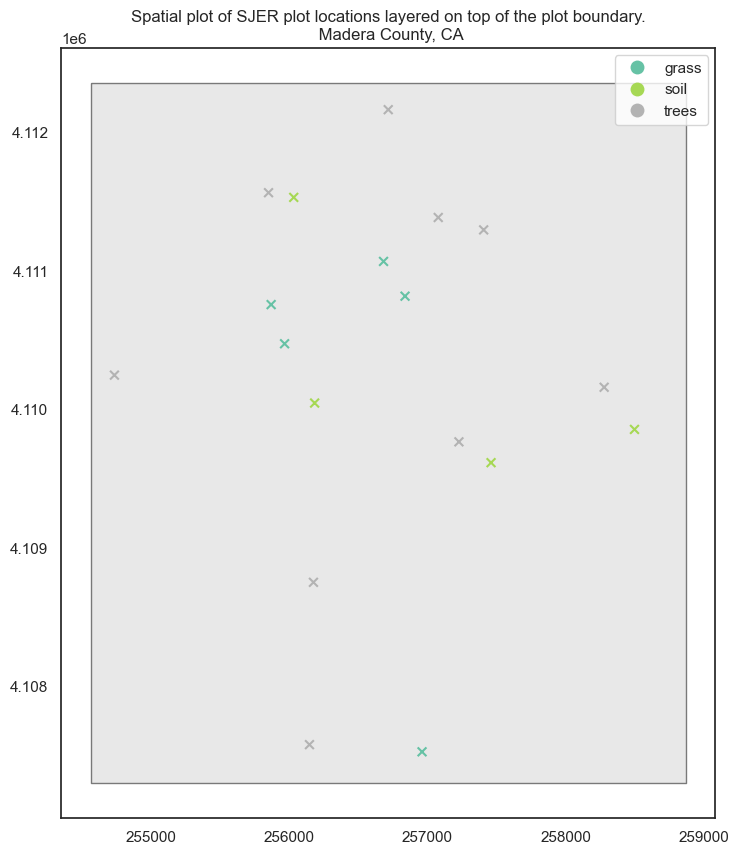

In [24]:
# creating a combined plot

fig, ax = plt.subplots(figsize=(10,10))

# creating the polygon as the base layer
crop_extent.plot(
    color='lightgrey',
    edgecolor='black',
    alpha=.5,
    ax=ax
)

# adding another layer using same axes
df_tree.plot(
    column='plot_type',
    marker = "x",
    markersize=40,
    cmap='Set2',
    legend=True,
    ax=ax
)
plt.title('Spatial plot of SJER plot locations layered on top of the plot boundary.\n Madera County, CA')